In [ ]:
### Imports
import pandas as pd
import numpy as np

# Audio Processing
import torch
import torchaudio
import librosa
import soundfile as sf

# Transformers
from transformers import (
    Wav2Vec2Processor, Wav2Vec2Model,
    AutoProcessor, HubertModel
)

# TensorFlow + VGGish
import tensorflow as tf
import tensorflow_hub as hub

# OpenL3
!pip install openl3
import openl3

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openl3: filename=openl3-0.4.2-py2.py3-none-any.whl size=249327030 sha256=c9f978339f994e684807885027e8ed0211e6acbe47d7e5e4a2cbc08a529627c5
  Stored in directory: /root/.cache/pip/wheels/35/e9/4c/b1e39385b21f2b4d70c01b8793ecc921d69f167cc772868abe
  Created wheel for kapre: filename=kapre-0.3.7-py3-none-any.whl size=29642 sha256=12638186f4d6a27784ca6e2d6476464f7139b6cc03ac521f01aed15af2d91d73
  Stored in directory: /root/.cache/pip/wheels/d2/17/ce/09b7d799a7c8b463b0a1657941331e0f10112864ff78d28f87
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320705 sha256=807b4b3c703139d4f21bf495fd9b45bf25b88cbdb20416d95b297cab623486c5
  Stored in directory: /root/

In [ ]:
## Importing and updating FFMPEG
import os, uuid, re, IPython
import ipywidgets as widgets
import time

from glob import glob
from google.colab import output, drive

from IPython.display import clear_output
import os, sys, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/yunooooo/gcct/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Cloning Repositories...", ty='twg')
!git clone https://github.com/XniceCraft/ffmpeg-colab.git
!chmod 755 ./ffmpeg-colab/install
textAn("Installing FFmpeg...", ty='twg')
!./ffmpeg-colab/install
clear_output()
print('Installation finished!')
!rm -fr /content/ffmpeg-colab
!ffmpeg -version

Installation finished!
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
built with gcc 12 (Debian 12.2.0-14)
configuration: --prefix=/home/ffmpeg-builder/release --pkg-config-flags=--static --extra-libs=-lm --disable-doc --disable-debug --disable-shared --disable-ffprobe --enable-static --enable-gpl --enable-version3 --enable-runtime-cpudetect --enable-avfilter --enable-filters --ld=g++ --enable-nvenc --enable-nvdec --enable-cuvid --toolchain=hardened --disable-stripping --enable-opengl --pkgconfigdir=/home/ffmpeg-builder/release/lib/pkgconfig --extra-cflags='-I/home/ffmpeg-builder/release/include -static -static-libstdc++ -static-libgcc ' --extra-ldflags='-L/home/ffmpeg-builder/release/lib -fstack-protector -Wl,--allow-multiple-definition -static-libstdc++ -static-libgcc ' --extra-cxxflags='-static -static-libstdc++ -static-libgcc ' --extra-ldexeflags='-static-libstdc++ -static-libgcc ' --extra-libs='-ldl -lrt -lpthread' --enable-ffnvcodec --enable-gmp --enable-libaom 

In [ ]:
### Access the hf dataset
import os
from getpass import getpass

hf_token = getpass('Enter your Hugging Face token:')
os.environ['HF_TOKEN'] = hf_token

!huggingface-cli login --token $HF_TOKEN
!huggingface-cli download ControlNet/AV-Deepfake1M-PlusPlus train/train.zip.001 --repo-type dataset --local-dir ./AV-Deepfake1M-PlusPlus

Enter your Hugging Face token:··········
The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
The token `itau-group4` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
train/train.zip.001: 100% 1.05G/1.05G [00:15<00:00, 68.7MB/s]
Download complete. Moving file to AV-Deepfake1M-PlusPlus/train/train.zip.001
AV-Deepfake1M-PlusPlus/train/train.zip.001


In [ ]:
!7z x -aoa AV-Deepfake1M-PlusPlus/train/train.zip.001 -oAV-Deepfake1M-PlusPlus/train/


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1048576000 bytes (1000 MiB)

Extracting archive: AV-Deepfake1M-PlusPlus/train/train.zip.001
  0% 1 Open           
train.zip
ERRORS:
Unexpected end of archive

--
Path = AV-Deepfake1M-PlusPlus/train/train.zip.001
Type = Split
Physical Size = 1048576000
Volumes = 1
Total Physical Size = 1048576000
----
Path = train.zip
Size = 1048576000
--
Path = train.zip
Type = zip
ERRORS:
Unexpected end of archive
Physical Size = 1048890151

 88%      2% 45 - train/lrs3/0OkOQhXhsIE/00001/00001_p4.mp4                                                     3% 59 - train/lrs3/0OkOQhXhsIE/00003/00003.mp4

In [ ]:
### mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
### Access the pkl file for assembly
audio_dataset = pd.read_pickle('/content/drive/MyDrive/Project_4_Deepfake_Detection/Summer 2025/Code/audio_dataset_fixed.pkl')
video_dataset = pd.read_pickle('/content/drive/MyDrive/Project_4_Deepfake_Detection/Summer 2025/Code/video_dataset_fixed.pkl')

In [ ]:
### print video_dataset rows 560-570
print(video_dataset.iloc[560:570])

    video_label                                         video_path  \
560        real  /content/train/lrs3/3LfVxGdczEA/00004/00004_p3...   
561        real  /content/train/lrs3/3LfVxGdczEA/00004/00004_p2...   
562        real  /content/train/lrs3/3LfVxGdczEA/00004/00004_p4...   
563        real    /content/train/lrs3/3LfVxGdczEA/00004/00004.mp4   
564        real  /content/train/lrs3/3lxyiS3CGrk/00001/00001_p3...   
565        real  /content/train/lrs3/3lxyiS3CGrk/00001/00001_p2...   
566        real  /content/train/lrs3/3lxyiS3CGrk/00001/00001_p1...   
567        real  /content/train/lrs3/3lxyiS3CGrk/00001/00001_p4...   
568        real    /content/train/lrs3/3lxyiS3CGrk/00001/00001.mp4   
569        real  /content/train/lrs3/3lxyiS3CGrk/00021/00021_p1...   

                                             json_path  \
560  /content/train/lrs3/3LfVxGdczEA/00004/00004_p3...   
561  /content/train/lrs3/3LfVxGdczEA/00004/00004_p2...   
562  /content/train/lrs3/3LfVxGdczEA/00004/00004_p4... 

In [ ]:
audio_dataset.head()

,audio_label,video_path,json_path,source_folder,segment_start,segment_end,paired_real_path,paired_real_json,paired_fake_path,paired_fake_json
0,real,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p4...,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p4...,/content/train/lrs3/0N1oA9LUEc4/00008,1.05,1.33,NaN,NaN,NaN,NaN
1,real,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p1...,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p1...,/content/train/lrs3/0N1oA9LUEc4/00008,1.51,1.85,NaN,NaN,NaN,NaN
2,real,/content/train/lrs3/0N1oA9LUEc4/00008/00008.mp4,/content/train/lrs3/0N1oA9LUEc4/00008/00008.json,/content/train/lrs3/0N1oA9LUEc4/00008,2.14,2.24,NaN,NaN,NaN,NaN
3,real,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p3...,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p3...,/content/train/lrs3/0N1oA9LUEc4/00008,0.04,0.17,NaN,NaN,NaN,NaN
4,real,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p2...,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p2...,/content/train/lrs3/0N1oA9LUEc4/00008,3.76,3.89,NaN,NaN,NaN,NaN


In [ ]:
video_dataset.head(6)

,video_label,video_path,json_path,source_folder,segment_start,segment_end,paired_real_path,paired_real_json,paired_fake_path,paired_fake_json
0,real,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p4...,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p4...,/content/train/lrs3/0N1oA9LUEc4/00008,1.26,1.67,NaN,NaN,NaN,NaN
1,real,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p1...,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p1...,/content/train/lrs3/0N1oA9LUEc4/00008,1.01,1.23,NaN,NaN,NaN,NaN
2,real,/content/train/lrs3/0N1oA9LUEc4/00008/00008.mp4,/content/train/lrs3/0N1oA9LUEc4/00008/00008.json,/content/train/lrs3/0N1oA9LUEc4/00008,1.42,1.81,NaN,NaN,NaN,NaN
3,real,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p3...,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p3...,/content/train/lrs3/0N1oA9LUEc4/00008,2.77,3.11,NaN,NaN,NaN,NaN
4,real,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p2...,/content/train/lrs3/0N1oA9LUEc4/00008/00008_p2...,/content/train/lrs3/0N1oA9LUEc4/00008,2.95,3.21,NaN,NaN,NaN,NaN
5,real,/content/train/lrs3/0N1oA9LUEc4/00009/00009_p2...,/content/train/lrs3/0N1oA9LUEc4/00009/00009_p2...,/content/train/lrs3/0N1oA9LUEc4/00009,2.28,2.54,NaN,NaN,NaN,NaN


In [ ]:
print(len(video_dataset))
print(video_dataset['video_path'].nunique())

1057
514


In [ ]:
print(len(audio_dataset))
print(audio_dataset['video_path'].nunique())

1053
506


In [ ]:
print(audio_dataset['audio_label'].value_counts())
print(video_dataset['video_label'].value_counts())

audio_label
real    635
fake    418
Name: count, dtype: int64
video_label
real    637
fake    420
Name: count, dtype: int64


A small issue I ran into was that some of the clips are too short and I could not extract any key frames. Thus, the function takes the frame inside (start_time, end_time) closest to a keyframe that might be in (start_time - 3, end_time)
NOTE: There is still a small chance that we get no frames at all

In case we do not find a keyframe in the given clip, I added a fallback_fn parameter. I give two options at the moment: a "closest frame to a keyframe" option, and a "get a random frame" option. Given that the keyframes are often not found, I think it might be better to switch our approach to getting a set number of equally spaced frames from each clip.


**NOTE: For this to work, the /train folder with the /lrs3 folder needs to be in /content**

/content/train/lrs3/0N1oA9LUEc4/00008/00008_p4.mp4 1.26 1.67 real
Extracting frames at times: [1.3625, 1.4649999999999999, 1.5675]


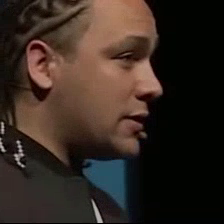

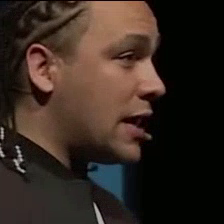

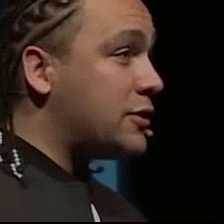

/content/train/lrs3/0N1oA9LUEc4/00008/00008_p1.mp4 1.01 1.23 real
Extracting frames at times: [1.065, 1.12, 1.175]


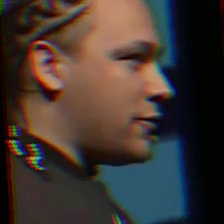

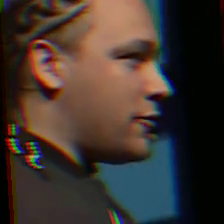

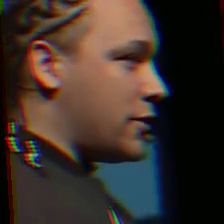

/content/train/lrs3/0N1oA9LUEc4/00008/00008.mp4 1.42 1.81 real
Extracting frames at times: [1.5175, 1.615, 1.7125]


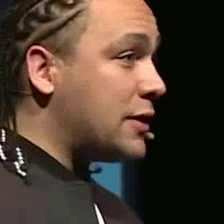

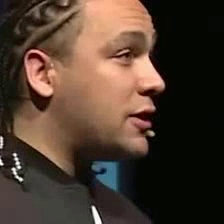

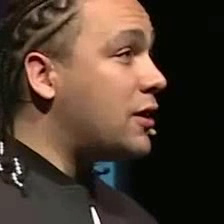

/content/train/lrs3/0N1oA9LUEc4/00008/00008_p3.mp4 3.0 3.34 real
Extracting frames at times: [3.085, 3.17, 3.255]


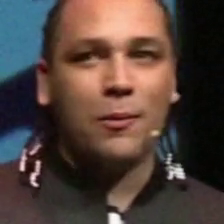

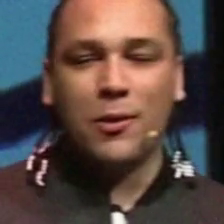

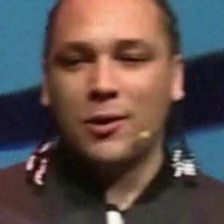

/content/train/lrs3/0N1oA9LUEc4/00008/00008_p2.mp4 2.75 3.01 real
Extracting frames at times: [2.815, 2.88, 2.945]


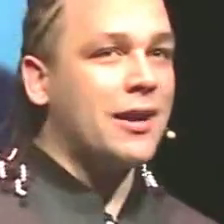

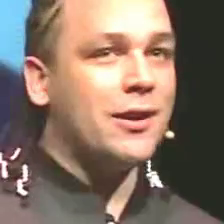

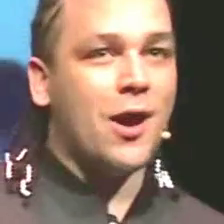

In [ ]:
import subprocess
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import random

def get_random_frame(video_path, start_time, end_time):
    """Extract a random frame from the video using ffmpeg."""
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()

    frame_size = width * height * 3
    random_time = random.uniform(start_time, end_time)
    timestamp = f"{int(random_time // 3600):02}:{int((random_time % 3600) // 60):02}:{random_time % 60:06.3f}"

    cmd = [
        "ffmpeg", "-ss", timestamp, "-i", video_path,
        "-frames:v", "1", "-f", "rawvideo", "-pix_fmt", "bgr24", "-"
    ]

    process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.DEVNULL)
    raw_frame = process.stdout.read(frame_size)
    process.stdout.close()
    process.wait()

    if len(raw_frame) == frame_size:
        frame = np.frombuffer(raw_frame, np.uint8).reshape((height, width, 3))
        print(f"[Random] Extracted frame at {timestamp}. Shape: {frame.shape}")
        return frame
    else:
        print(f"[Random] No frame extracted at {timestamp}.")
        return None

def extract_closest_keyframe(video_path, start_time, end_time):
    """
    Extracts the closest keyframe (I-frame) to the given interval.
    Returns a numpy array representing the frame or None.
    """
    # Get video resolution
    cap = cv2.VideoCapture(video_path)
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    frame_size = width * height * 3

    # Step 1: Use ffprobe to list all keyframe timestamps
    ffprobe_cmd = [
        "ffprobe", "-loglevel", "error", "-select_streams", "v:0",
        "-skip_frame", "nokey", "-show_entries", "frame=pkt_pts_time",
        "-of", "csv=p=0", video_path
    ]
    try:
        timestamps_raw = subprocess.check_output(ffprobe_cmd).decode("utf-8").strip().split("\n")
        timestamps = [float(t) for t in timestamps_raw if t.strip()]
    except subprocess.CalledProcessError:
        print("Error extracting keyframes with ffprobe.")
        return None

    # Step 2: Find the closest timestamp to the interval
    interval_center = (start_time + end_time) / 2
    closest_time = min(timestamps, key=lambda t: abs(t - interval_center))
    closest_timestamp = f"{int(closest_time // 3600):02}:{int((closest_time % 3600) // 60):02}:{closest_time % 60:06.3f}"
    print(f"[Keyframe Fallback] Closest keyframe at {closest_time:.3f}")

    # Step 3: Extract that frame using ffmpeg
    ffmpeg_cmd = [
        "ffmpeg", "-ss", closest_timestamp, "-i", video_path,
        "-frames:v", "1", "-f", "rawvideo", "-pix_fmt", "bgr24", "-"
    ]
    process = subprocess.Popen(ffmpeg_cmd, stdout=subprocess.PIPE, stderr=subprocess.DEVNULL)
    raw_frame = process.stdout.read(frame_size)
    process.stdout.close()
    process.wait()

    if len(raw_frame) == frame_size:
        frame = np.frombuffer(raw_frame, np.uint8).reshape((height, width, 3))
        return frame
    else:
        print("Failed to extract frame at closest keyframe timestamp. Getting random frame")
        return get_random_frame(video_path, start_time, end_time)


### Keyframe Extraction Function ###

def stream_keyframes(video_path, start_time, end_time, fallback_fn):
    """Yield keyframes between start_time and end_time, or fall back if needed."""
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    frame_size = width * height * 3

    ffmpeg_cmd = [
        'ffmpeg', '-ss', str(start_time), '-to', str(end_time), '-i', video_path,
        '-vf', "select='eq(pict_type\\,I)'",
        '-vsync', 'vfr',
        '-f', 'image2pipe',
        '-pix_fmt', 'bgr24',
        '-vcodec', 'rawvideo',
        '-'
    ]

    process = subprocess.Popen(ffmpeg_cmd, stdout=subprocess.PIPE, stderr=subprocess.DEVNULL)

    yielded = False
    while True:
        raw_frame = process.stdout.read(frame_size)
        if len(raw_frame) < frame_size:
            break
        frame = np.frombuffer(raw_frame, np.uint8).reshape((height, width, 3))
        if frame is not None and frame.shape[:2] == (height, width):
            yielded = True
            yield frame

    process.stdout.close()
    process.wait()

    if not yielded:
        print("[Keyframe Stream] No keyframes found. Trying fallback.")
        fallback = fallback_fn(video_path, start_time, end_time)
        if fallback is not None:
            yield fallback


def extract_three_frames(video_path, start_time, end_time):
    """
    Extracts 3 equally spaced frames from the given time interval of a video.

    Args:
        video_path (str): Path to the video file.
        start_time (float): Start time in seconds.
        end_time (float): End time in seconds.

    Returns:
        List of np.ndarray frames.
    """
    duration = end_time - start_time
    if duration <= 0:
        raise ValueError("End time must be greater than start time.")

    # Generate 3 equally spaced timestamps
    offsets = [0.25, 0.5, 0.75]
    timestamps = [start_time + duration * frac for frac in offsets]
    print(f'Extracting frames at times: {timestamps}')

    # Get video resolution using OpenCV
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()

    frame_size = width * height * 3
    frames = []

    for t in timestamps:
        ts = f"{int(t // 3600):02}:{int((t % 3600) // 60):02}:{t % 60:06.3f}"

        cmd = [
            'ffmpeg', '-ss', ts, '-i', video_path,
            '-frames:v', '1',
            '-f', 'rawvideo',
            '-pix_fmt', 'bgr24',
            '-loglevel', 'error',
            '-'
        ]

        process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.DEVNULL)
        raw_frame = process.stdout.read(frame_size)
        process.stdout.close()
        process.wait()

        if len(raw_frame) == frame_size:
            frame = np.frombuffer(raw_frame, np.uint8).reshape((height, width, 3))
            frames.append(frame)
        else:
            print(f"⚠️ Could not extract frame at {ts}")

    return frames

### Example ###
for i, row in video_dataset.head(5).iterrows():
  video_path_example = row["video_path"]
  start_time_example = row["segment_start"]
  end_time_example = row["segment_end"]
  print(row["video_path"], row["segment_start"], row["segment_end"], row["video_label"])
  example_keyframes = extract_three_frames(video_path_example, start_time_example, end_time_example)
  for frame in example_keyframes:
    cv2_imshow(frame)
  # example_random_frame = get_random_frame(video_path_example, start_time_example, end_time_example)
  # cv2_imshow(example_random_frame)
    # Display keyframes

RIDNet Denoising Setup

In [ ]:
!git clone https://github.com/saeed-anwar/RIDNet.git # Clones github repo
%cd RIDNet/TestCode/code

Cloning into 'RIDNet'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (246/246), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 246 (delta 64), reused 246 (delta 64), pack-reused 0 (from 0)
Receiving objects: 100% (246/246), 16.73 MiB | 18.06 MiB/s, done.
Resolving deltas: 100% (64/64), done.
/content/RIDNet/TestCode/code


Upload the ridnet.pt file to the Colab https://drive.google.com/file/d/1QxO6KFOVxaYYiwxliwngxhw_xCtInSHd/view

In [ ]:
from model.ridnet import RIDNET

class Args:
    def __init__(self):
        self.n_feats = 64
        self.rgb_range = 255
        self.reduction = 16

args = Args()

model = RIDNET(args)
model.load_state_dict(torch.load('/content/ridnet.pt', map_location='cpu'))  # or 'cuda'
model.eval()

RIDNET(
  (sub_mean): MeanShift(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (add_mean): MeanShift(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (head): BasicBlock(
    (body): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
    )
  )
  (b1): Block(
    (r1): Merge_Run_dual(
      (body1): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
        (3): ReLU(inplace=True)
      )
      (body2): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3), dilation=(3, 3))
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(4, 4), dilation=(4, 4))
        (3): ReLU(inplace=True)
      )
      (body3): Sequential(
        (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), pad

**RIDNET Denoiser Functions**

In [ ]:
import torchvision.transforms as transforms
import torch
from PIL import Image

def denoise_with_RIDNET(img):
  transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Lambda(lambda x: x * 255)
  ])
  input_tensor = transform(img).unsqueeze(0)

  with torch.no_grad():
      output = model(input_tensor)

  # Clamp and convert to image
  denoised_img = output.squeeze(0).clamp(0, 255).byte().permute(1, 2, 0).cpu().numpy()
  # print(type(denoised_img))
  return denoised_img

def extract_noise(img):
  return img - denoise_with_RIDNET(img)

### Example ###
# denoised_frames = []
# video_path_example = "/content/AdobeStock_391404706.mov"
# start_time_example = 5.97
# end_time_example = 6.12
# example_keyframes = get_keyframes(video_path_example, start_time_example, end_time_example)
# # example_random_frame = get_random_frame(video_path_example, start_time_example, end_time_example)
# # cv2_imshow(example_random_frame)
# for key_frame in example_keyframes:
#     # Display keyframes
#     cv2_imshow(key_frame)
#     # Suppose `frame` is a BGR NumPy array from OpenCV
#     frame_rgb = cv2.cvtColor(key_frame, cv2.COLOR_BGR2RGB)  # convert to RGB
#     pil_image = Image.fromarray(frame_rgb)
#     denoised_frames.append(denoise_with_RIDNET(pil_image))

# for i in range(len(denoised_frames)):
#     # Calculate the residual
#     cv2_imshow(example_keyframes[i] - denoised_frames[i])

**Facial Extraction**

In [ ]:
!pip install dlib opencv-python
import dlib
import cv2
from google.colab.patches import cv2_imshow

def isolate_face(img_array):
  # === Load face detector ===
  detector = dlib.get_frontal_face_detector()

  # === Load image (can be a frame from video) ===
  gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

  # === Detect faces ===
  dlib_rects = detector(gray, 1)  # second arg = upsample times

  if not dlib_rects:
      print("No faces detected!")
      return img_array
  # === Extract faces ===
  for rect in dlib_rects:
      x1 = rect.left()
      y1 = rect.top()
      x2 = rect.right()
      y2 = rect.bottom()

      # Crop and store face
      face = img_array[y1:y2, x1:x2]
      # Cut short to extract one fac, but it can be used to extract all faces
      # NOTE: All faces might give us more datapoints
      # cv2_imshow(face)
      return face

In [ ]:
# Forensic Embedding Functions
# this assumes that you only have 1 type of embedding (ie RIDNet)
# if you use multiple models, rewrite the function for that specific model
#

import gc

def embedding_keyframe(video_path, start_time, end_time):
    embeddings = []
    for keyframe in extract_three_frames(video_path, start_time, end_time):
        try:
            noise = extract_noise(keyframe)
            emb = noise.flatten()
            embeddings.append(emb)

            # Free memory after each frame
            del keyframe, noise, emb
            gc.collect()

        except Exception as e:
            print(f"Skipping frame due to error: {e}")
            continue

    return embeddings


def embedding_face_keyframe(video_path, start_time, end_time):
    embeddings = []
    for keyframe in extract_three_frames(video_path, start_time, end_time):
        try:
            face = isolate_face(keyframe)
            noise = extract_noise(face)
            emb = noise.flatten()
            embeddings.append(emb)

            # Free memory after each frame
            del keyframe, noise, emb, face
            gc.collect()

        except Exception as e:
            print(f"Skipping frame due to error: {e}")
            continue

    return embeddings

### Example ###
# video_path_example = "/content/AdobeStock_391404706.mov"
# start_time_example = 4.3
# end_time_example = 4.5
# print(embedding_keyframe(video_path_example, start_time_example, end_time_example, get_random_frame))

**RESNet Embedding Process**

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as T
from PIL import Image
import os

# RESNet Setup
# Load pretrained ResNet-50
resnet = models.resnet50(pretrained=True)
resnet.eval()

# Remove final classification layer to get the 2048-dim embedding
feature_extractor = torch.nn.Sequential(*list(resnet.children())[:-1])  # Removes final FC layer


transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet training data mean and standard deviation
                std=[0.229, 0.224, 0.225])
])

  warnings.warn(

  warnings.warn(msg)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 172MB/s]


In [ ]:
"""
Produces the ResNet embedding for the given image

Image must be a numpy.ndarray
"""
def get_resnet_embedding(img_array):
    # Convert from OpenCV BGR to RGB if needed
    if img_array.shape[2] == 3:
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

    # Convert to PIL Image
    img = Image.fromarray(img_array)

    # Apply preprocessing
    tensor = transform(img).unsqueeze(0)  # shape: [1, 3, 224, 224]

    # Extract features
    with torch.no_grad():
        features = feature_extractor(tensor)  # shape: [1, 2048, 1, 1] or similar
    return features.view(-1).numpy()  # Flatten to [2048]

### Example ###
# img_path_example = "/content/IMG_20180819_210354.jpg"
# img_ndarray = extract_noise(Image.open(img_path_example))
# print(get_resnet_embedding(img_ndarray))

In [ ]:
# Forensic Embedding Functions Using RESNet
import gc

# Instead of applying a PCA after flattening, we will just embed the noise of each keyframe with resnet
def embedding_keyframe_resnet(video_path, start_time, end_time):
    embeddings = []

    for keyframe in stream_keyframes(video_path, start_time, end_time, get_random_frame):
        try:
            noise = extract_noise(keyframe)
            emb = get_resnet_embedding(noise)
            embeddings.append(emb)

            # Free memory after each frame
            del keyframe, noise, emb
            gc.collect()

        except Exception as e:
            print(f"Skipping frame due to error: {e}")
            continue

    return embeddings


### Example ###
# video_path_example = "/content/AdobeStock_391404706.mov"
# start_time_example = 4.3
# end_time_example = 4.5
# print(embedding_keyframe_resnet(video_path_example, start_time_example, end_time_example))


In [ ]:
# Forensic Embedding Functions Using RESNet (ONLY FACES)

def embedding_keyframe_resnet_face(video_path, start_time, end_time):
    embeddings = []
    for keyframe in stream_keyframes(video_path, start_time, end_time, get_random_frame):
        try:
            face = isolate_face(keyframe)
            noise = extract_noise(face)
            emb = get_resnet_embedding(noise)
            embeddings.append(emb)

            # Free memory after each frame
            del keyframe, noise, emb, face
            gc.collect()

        except Exception as e:
            print(f"Skipping frame due to error: {e}")
            continue

    return embeddings

### Examples ###
# video_path_example = "/content/AdobeStock_391404706.mov"
# start_time_example = 4.1
# end_time_example = 4.27
# print(embedding_keyframe_resnet_face(video_path_example, start_time_example, end_time_example))

In [ ]:
## CHANGING VideoFileClip for individual file_path, start_time, end_time parameters

import pandas as pd
from moviepy.editor import VideoFileClip
import numpy as np
import matplotlib.pyplot as plt

def extract_embeddings(df, embedding_fn, mode='video'):
    """
    Args:
        df (pd.DataFrame): DataFrame with columns ['video_path', 'video_label', 'segment_start', 'segment_end']
        embedding_fn (function): Function that takes in either a video clip or audio clip and returns an embedding
        mode (str): 'video' or 'audio'

    Returns:
        pd.DataFrame: A DataFrame with columns ['embedding', 'label']
    """
    results = []
    # Just try with first 500 rows
    for i, row in df.head(100).iterrows():
        try:
            #video = VideoFileClip(row['video_path']).subclip(row['segment_start'], row['segment_end'])
            if mode == 'video':
                emb_list = embedding_fn(row['video_path'], row['segment_start'], row['segment_end'])
                label = 1 if row['video_label'] == 'fake' else 0
            # elif mode == 'audio':
            #     audio = video.audio
            #     emb_ = embedding_fn(audio)
            #     label = 1 if row['audio_label'] == 'fake' else 0
            else:
                raise ValueError("Mode must be 'video' or 'audio'.")

            # Handle either single embedding or list
            if isinstance(emb_list, list) or isinstance(emb_list, np.ndarray) and len(emb_list) > 0 and isinstance(emb_list[0], (np.ndarray, list)):
                for emb in emb_list:
                    results.append({'embedding': emb, 'label': label})
            else:
                results.append({'embedding': emb_list, 'label': label}) # Ask about this

        except Exception as e:
            print(f"Skipping row {i} due to error: {e}")
            continue

    return pd.DataFrame(results)

####
### FOR SEPARATE TESTING ###
# print(extract_embeddings(video_dataset, embedding_keyframe, mode='video'))
# print(extract_embeddings(video_dataset, embedding_keyframe_resnet, mode='video'))
# print(extract_embeddings(video_dataset, embedding_face_keyframe_resnet, mode='video'))

In [ ]:
### Output Visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D projection

def plot_3d_embeddings(df_embeddings):
    """
    Plots 3D projection of embeddings using PCA.

    Args:
        df_embeddings (pd.DataFrame): DataFrame with 'embedding' and 'label' columns
    """

    # Stack embeddings into a matrix
    X = np.stack(df_embeddings['embedding'].values)
    y = df_embeddings['label'].values

    # Reduce to 3D using PCA
    pca = PCA(n_components=3)
    X_3d = pca.fit_transform(X)

    # Create color map
    colors = ['blue' if label == 0 else 'red' for label in y]

    # Plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=colors, alpha=0.7, s=30)
    ax.set_title('3D PCA Projection of Embeddings')
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')

    plt.show()

# df_embeddings = extract_embeddings(video_dataset, embedding_keyframe_resnet, mode='video')
# plot_3d_embeddings(df_embeddings)

# df_embeddings_face = extract_embeddings(video_dataset, embedding_keyframe_resnet_face, mode='video')
# plot_3d_embeddings(df_embeddings_face)


In [ ]:
### Extracting embeddings

# whole keyframes
keyframe_embeddings = extract_embeddings(video_dataset, embedding_keyframe, mode='video')
X_keyframe = np.stack(keyframe_embeddings['embedding'].values)
y_keyframe = keyframe_embeddings['label'].values

Extracting frames at times: [1.3625, 1.4649999999999999, 1.5675]
Extracting frames at times: [1.065, 1.12, 1.175]
Extracting frames at times: [1.5175, 1.615, 1.7125]
Extracting frames at times: [3.085, 3.17, 3.255]
Extracting frames at times: [2.815, 2.88, 2.945]
Extracting frames at times: [0.435, 0.5, 0.565]
Extracting frames at times: [3.7199999999999998, 3.75, 3.7800000000000002]
Extracting frames at times: [1.8125, 1.915, 2.0175]
Extracting frames at times: [2.6875, 2.7350000000000003, 2.7825]
Extracting frames at times: [1.9025, 1.975, 2.0475000000000003]
Extracting frames at times: [2.49, 2.55, 2.61]
Extracting frames at times: [3.285, 3.3200000000000003, 3.355]
Extracting frames at times: [0.35, 0.39, 0.43]
Extracting frames at times: [0.14750000000000002, 0.245, 0.34249999999999997]
Extracting frames at times: [0.82, 0.9299999999999999, 1.04]
Extracting frames at times: [0.6375, 0.685, 0.7325]
Extracting frames at times: [0.6825, 0.7150000000000001, 0.7475]
Extracting frames a

In [ ]:
print(len(X_mfcc))

NameError: name 'X_mfcc' is not defined

In [ ]:
# face keyframes
face_keyframe_embeddings = extract_embeddings(video_dataset, embedding_face_keyframe, mode='video')
X_face_keyframe = np.stack(keyframe_embeddings['embedding'].values)
y_face_keyframe = keyframe_embeddings['label'].values

Extracting frames at times: [1.3625, 1.4649999999999999, 1.5675]
Skipping frame due to error: Calculated padded input size per channel: (0 x 154). Kernel size: (1 x 1). Kernel size can't be greater than actual input size
Extracting frames at times: [1.065, 1.12, 1.175]
No faces detected!
Extracting frames at times: [1.5175, 1.615, 1.7125]
Skipping frame due to error: Calculated padded input size per channel: (0 x 154). Kernel size: (1 x 1). Kernel size can't be greater than actual input size
Extracting frames at times: [3.085, 3.17, 3.255]
Extracting frames at times: [2.815, 2.88, 2.945]
Skipping frame due to error: Calculated padded input size per channel: (0 x 154). Kernel size: (1 x 1). Kernel size can't be greater than actual input size
Extracting frames at times: [0.435, 0.5, 0.565]
Extracting frames at times: [3.7199999999999998, 3.75, 3.7800000000000002]
Extracting frames at times: [1.8125, 1.915, 2.0175]
Extracting frames at times: [2.6875, 2.7350000000000003, 2.7825]
Extractin

In [ ]:
## Additional code for PCA
pca_components = 128
X_keyframe = PCA(n_components= pca_components).fit_transform(X_keyframe)
X_face_keyframe = PCA(n_components= pca_components).fit_transform(X_face_keyframe)
print(f'Shape of Keyframe embedding list : {X_keyframe.shape}, Shape of Face Keyframe embedding list: {X_face_keyframe.shape}')

Shape of Keyframe embedding list : (300, 128), Shape of Face Keyframe embedding list: (300, 128)


In [ ]:
from sklearn.metrics import (
    roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_probs, display_title=None):
    results = {}

    # 1. AUROC
    results['roc_auc'] = roc_auc_score(y_true, y_probs)

    # 2. FNR when FPR ≤ 1% (or closest fallback)
    best_fnr = None
    best_thresh_fpr = None
    best_cm_fpr = None
    lowest_fpr = 1.0
    fallback = None

    for t in np.arange(0.01, 1.0, 0.01):
        preds = (y_probs > t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, preds, labels=[0, 1]).ravel()
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

        # Save best option for FPR ≤ 1%
        if fpr <= 0.01 and (best_fnr is None or fnr < best_fnr):
            best_fnr = fnr
            best_thresh_fpr = t
            best_cm_fpr = confusion_matrix(y_true, preds, labels=[0, 1])

        # Save fallback: lowest FPR seen
        if fpr < lowest_fpr:
            lowest_fpr = fpr
            fallback = {
                'fpr': fpr,
                'fnr': fnr,
                'threshold': t,
                'cm': confusion_matrix(y_true, preds, labels=[0, 1]),
            }

    # Use fallback if no threshold met FPR ≤ 1%
    if best_thresh_fpr is None and fallback:
        best_thresh_fpr = fallback['threshold']
        best_fnr = fallback['fnr']
        best_cm_fpr = fallback['cm']
        results['note'] = f"FPR > 1% at all thresholds — fallback used with FPR={fallback['fpr']:.3f}"

    results['best_thresh_fpr'] = best_thresh_fpr
    results['fnr_at_1%fpr'] = best_fnr

    if best_cm_fpr is not None:
        ConfusionMatrixDisplay(best_cm_fpr, display_labels=["Real", "Fake"]).plot(cmap='Blues')
        plt.title(f"{display_title or ''} Threshold={best_thresh_fpr:.2f} (FPR ≤ 1%)")
        plt.show()

    # 3. Best threshold for accuracy
    best_acc = 0
    best_thresh_acc = None
    best_cm_acc = None

    for t in np.arange(0.01, 1.0, 0.01):
        preds = (y_probs > t).astype(int)
        acc = accuracy_score(y_true, preds)
        if acc > best_acc:
            best_acc = acc
            best_thresh_acc = t
            best_cm_acc = confusion_matrix(y_true, preds, labels=[0, 1])

    results['best_thresh_acc'] = best_thresh_acc
    results['max_acc'] = best_acc

    if best_cm_acc is not None:
        ConfusionMatrixDisplay(best_cm_acc, display_labels=["Real", "Fake"]).plot(cmap='Blues')
        plt.title(f"{display_title or ''} Threshold={best_thresh_acc:.2f} (Max Accuracy)")
        plt.show()

    return results



--- keyframe ---


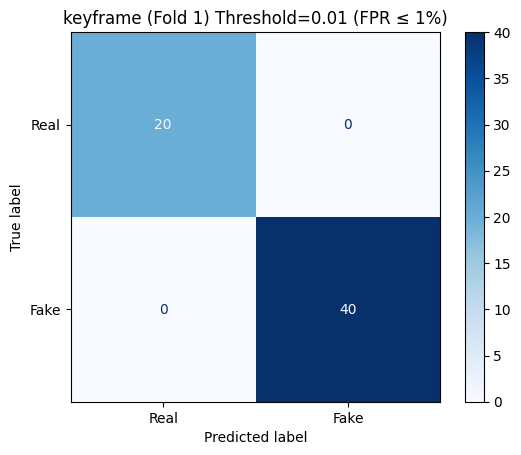

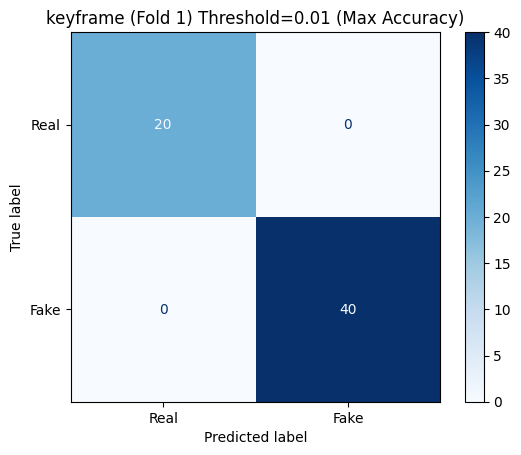

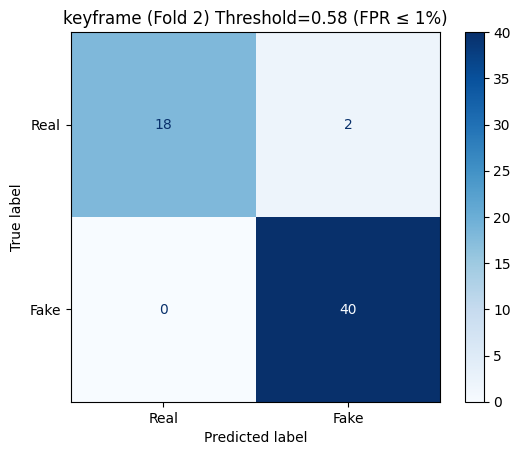

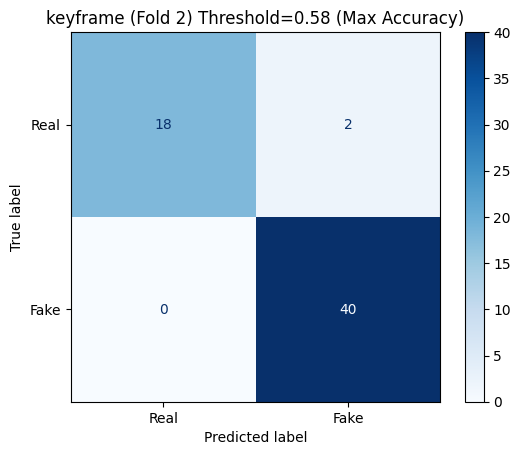

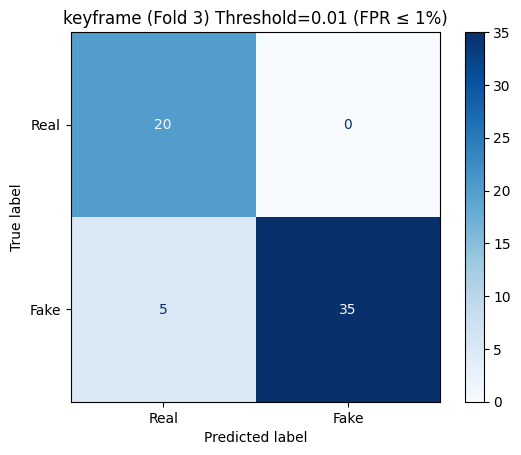

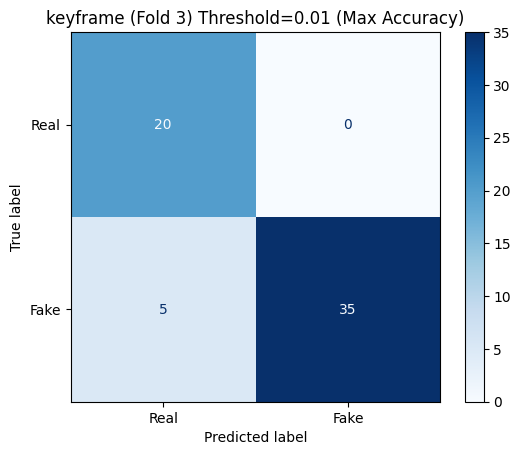

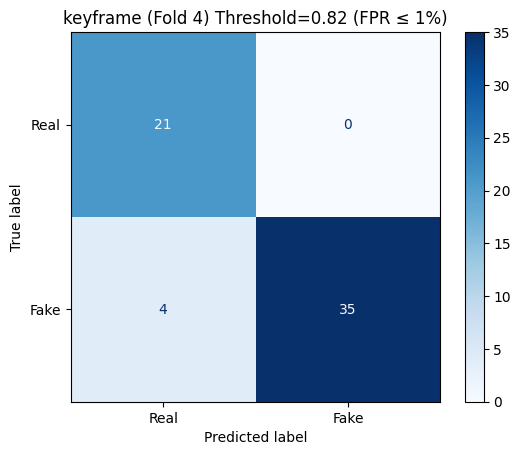

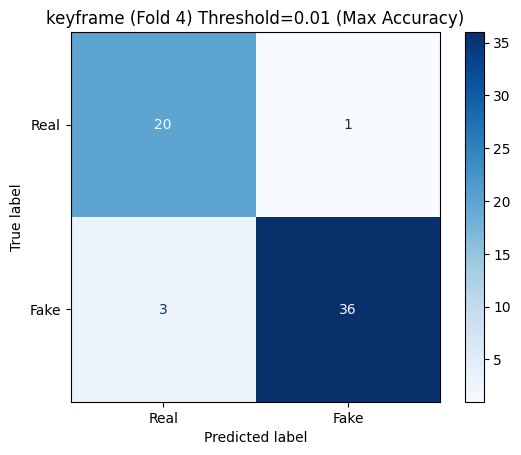

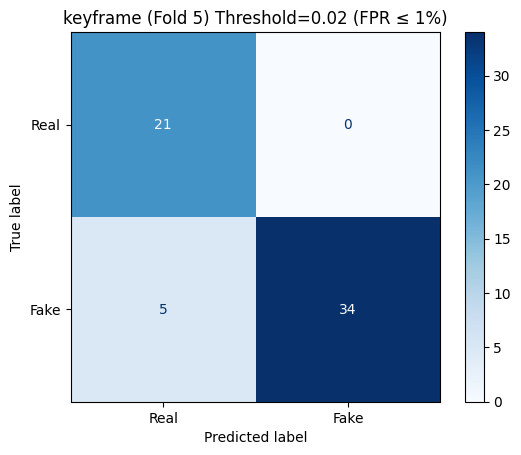

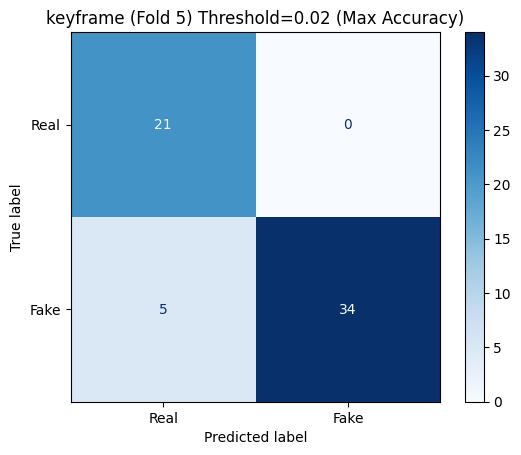


--- face_keyframe ---


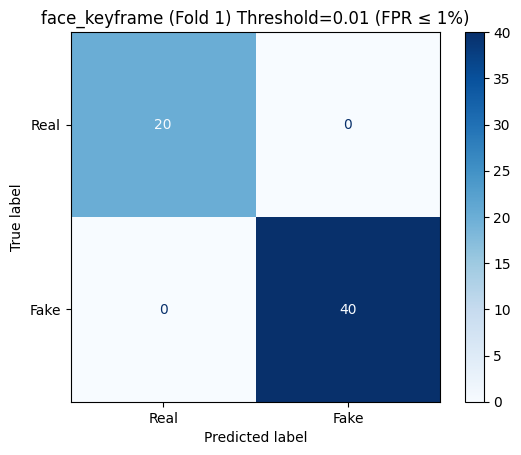

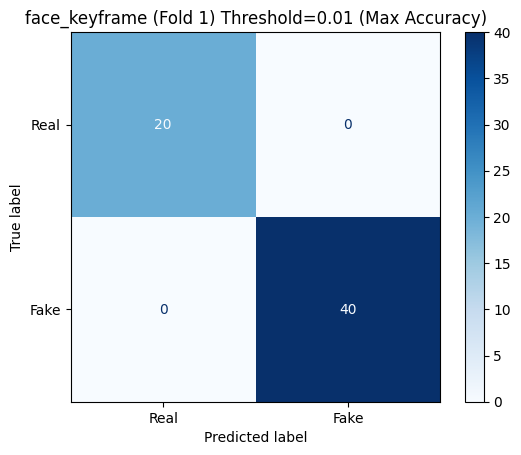

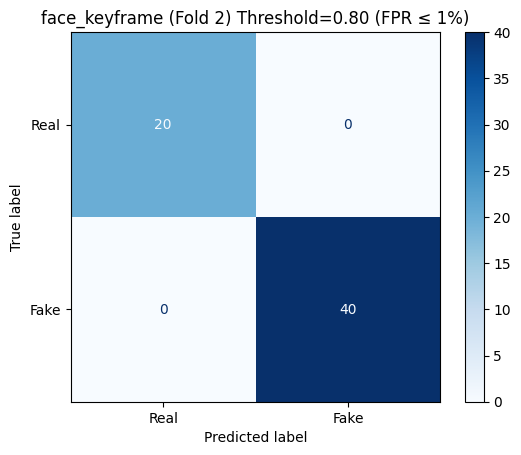

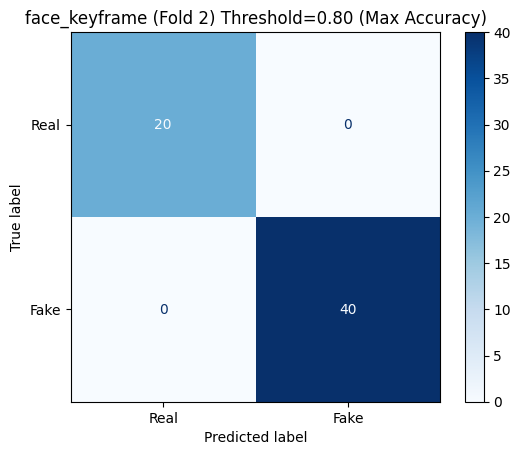

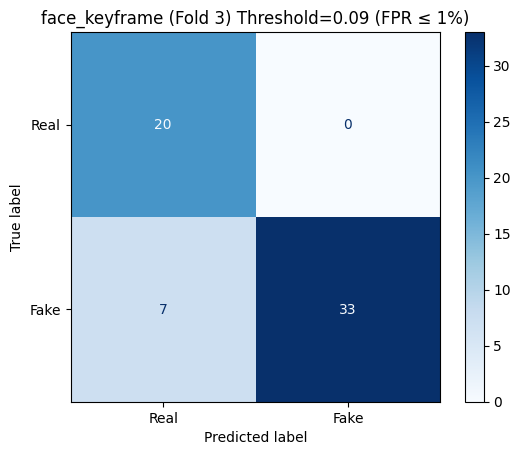

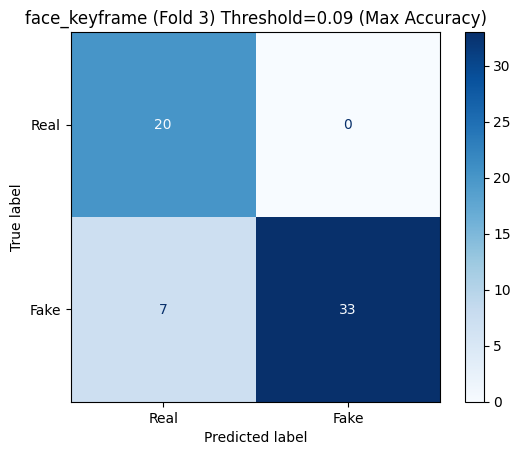

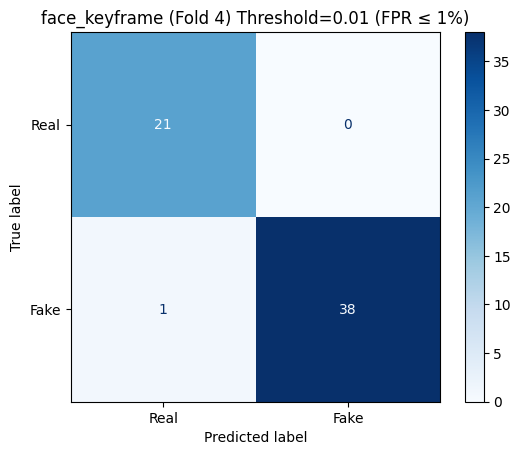

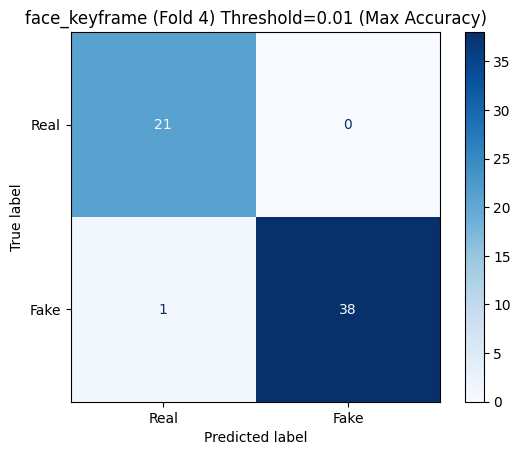

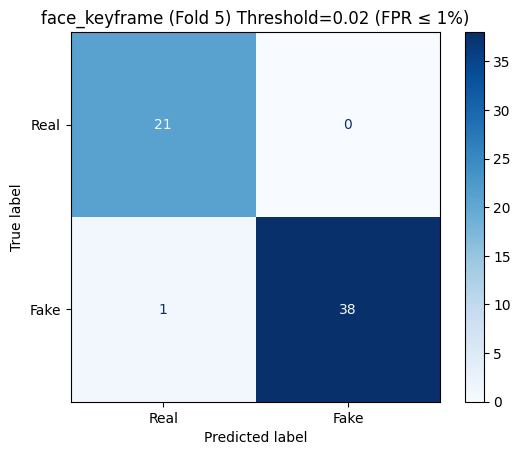

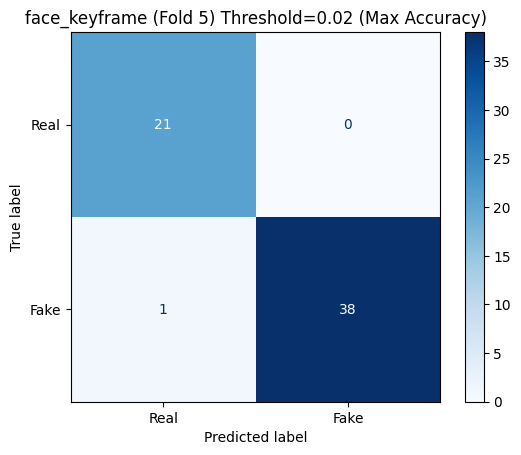

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

# Dictionary of embeddings
# Add any more here
embedding_sets = {
    'keyframe': (X_keyframe, y_keyframe),
    'face_keyframe': (X_face_keyframe, y_face_keyframe),
}

n_splits = 5
results = {}

for name, (X, y) in embedding_sets.items():
    y = 1 - y  # Flip labels so FAKE = 1
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    print(f"\n--- {name} ---")

    accs, f1s, aucs = [], [], []
    fnrs, roc_aucs = [], []

    for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf = LogisticRegression(max_iter=1000, class_weight='balanced')
        clf.fit(X_train, y_train)

        y_probs = clf.predict_proba(X_test)[:, 1]

        # Use your existing evaluation function
        display_title = f"{name} (Fold {fold_idx+1})"
        eval_results = evaluate_model(y_test, y_probs, display_title=display_title)

        accs.append(eval_results['max_acc'])
        fnrs.append(eval_results['fnr_at_1%fpr'])
        roc_aucs.append(eval_results['roc_auc'])

    results[name] = {
        'Accuracy (mean)': np.mean(accs),
        'FNR@1%FPR (mean)': np.mean(fnrs),
        'ROC AUC (mean)': np.mean(roc_aucs),
        'Accuracy (std)': np.std(accs),
        'FNR@1%FPR (std)': np.std(fnrs),
        'ROC AUC (std)': np.std(roc_aucs),
    }


In [ ]:
print(results)

{'keyframe': {'Accuracy (mean)': np.float64(0.9466666666666667), 'FNR@1%FPR (mean)': np.float64(0.07115384615384615), 'ROC AUC (mean)': np.float64(0.9866101953601953), 'Accuracy (std)': np.float64(0.032317865716108875), 'FNR@1%FPR (std)': np.float64(0.05876495710956841), 'ROC AUC (std)': np.float64(0.00813905300664127)}, 'face_keyframe': {'Accuracy (mean)': np.float64(0.97), 'FNR@1%FPR (mean)': np.float64(0.04525641025641025), 'ROC AUC (mean)': np.float64(0.9952789987789987), 'Accuracy (std)': np.float64(0.0439696865275764), 'FNR@1%FPR (std)': np.float64(0.06587747876985714), 'ROC AUC (std)': np.float64(0.006812955847481892)}}
